In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
from datasets import load_dataset
dataset=load_dataset('lukebarousse/data_jobs')
df= dataset["train"].to_pandas()
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list )


c:\Users\Chira\.conda\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import seaborn as sns

In [4]:
df_us=df[(df['job_title_short']=="Data Analyst") & (df['job_country']=='United States')].copy()
df_us=df_us.dropna(subset=['salary_year_avg'])
df_us=df_us.explode('job_skills')
df_us_grp=df_us.groupby('job_skills')['salary_year_avg'].agg(['count','median'])
df_us_toppay= df_us_grp.sort_values(by='median', ascending=False).head(10)
df_us_skill= df_us_grp.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

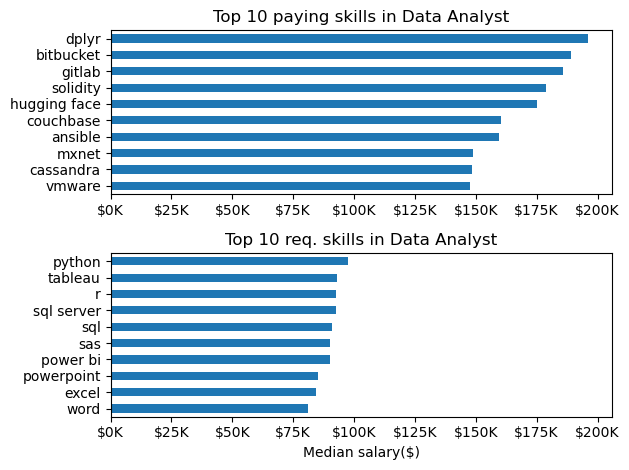

In [5]:
fig,ax=plt.subplots(2,1)

df_us_toppay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) ## since barh thats why y='median'
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].set_title('Top 10 paying skills in Data Analyst')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x/1000)}K'))
df_us_skill[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_ylabel('')
ax[1].set_xlabel('Median salary($)')
ax[1].set_title('Top 10 req. skills in Data Analyst')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x/1000)}K'))
# plt.tight_layout()
# plt.show()  ### you can also use this as long as not mentioning any ax it will apply on whole fig
fig.tight_layout()

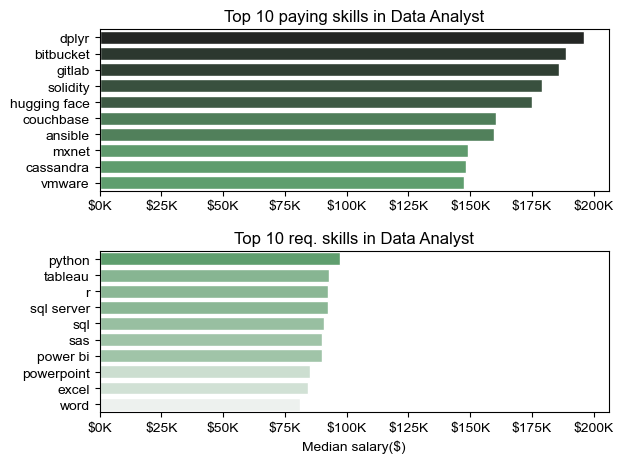

In [11]:
## using seaborn
fig,ax=plt.subplots(2,1)

sns.set_theme(style='ticks')

sns.barplot(data=df_us_toppay, x='median', y=df_us_toppay.index, ax=ax[0], hue='median', palette='dark:g_r') #g-->green,, _r-->reverse the colour grading
# df_us_toppay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) ## since barh thats why y='median'
ax[0].legend().remove()
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].set_title('Top 10 paying skills in Data Analyst')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x/1000)}K'))
# df_us_skill[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
sns.barplot(data=df_us_skill, x='median', y=df_us_skill.index, ax=ax[1], hue='median', palette='light:g')
ax[1].legend().remove()
ax[1].set_ylabel('')
ax[1].set_xlabel('Median salary($)')
ax[1].set_title('Top 10 req. skills in Data Analyst')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x/1000)}K'))
# plt.tight_layout()
# plt.show()  ### you can also use this as long as not mentioning any ax it will apply on whole fig
fig.tight_layout()

Plotting the histogram into a distribution style plot

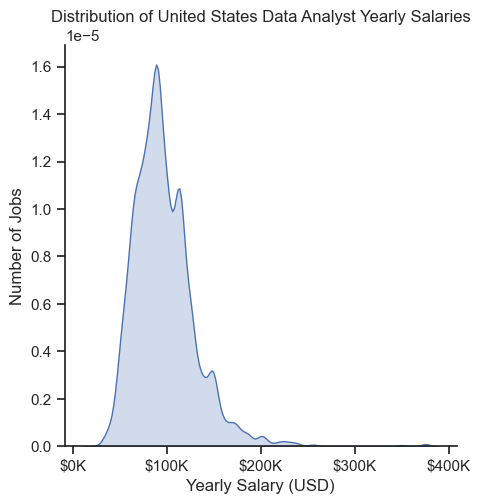

In [16]:
sns.displot(df_us['salary_year_avg'], kind='kde', fill=True) ## kde for smooth distribution
plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Number of Jobs')
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.show()